In [1]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML
rc('animation', html='html5')

In [2]:
#Semileg function to perform linear internpolation
def semileg(Nt,Ns,C,dt,dx):
    """
    input: 
    Nt: Discrete Point in Time
    Ns: Discrete Point in Space
    C : Matrix C that stores the advection result for all time step
    dt: Time step
    dx: Space discretization value
    Output:
    Output the matrix C that have the value of advection for all time step
    """
    for i in range(1,Nt):
        for j in range(Ns):
            if(j==0):
                if(a>=0):
                    C[i][j] = a*dt/dx*C[i-1][-1] + (1-a*dt/dx)*C[i-1][j]
                elif(a<0):
                    C[i][j] = (1+a*dt/dx)*C[i-1][0] - a*dt/dx*C[i-1][j+1]

            elif(j==Ns-1):
                if(a>=0):
                    C[i][j] = a*dt/dx*C[i-1][j-1] + (1-a*dt/dx)*C[i-1][j]
                elif(a<0):
                    C[i][j] = (1+a*dt/dx)*C[i-1][j] - a*dt/dx*C[i-1][0]
            else:
                if(a>=0):
                    C[i][j] = a*dt/dx*C[i-1][j-1] + (1-a*dt/dx)*C[i-1][j]
                elif(a<0):
                    C[i][j] = (1+a*dt/dx)*C[i-1][j] - a*dt/dx*C[i-1][j+1]

In [3]:
#This code has been taken from https://github.com/christian512/SemiLagPy

def Animation(data):
    """
    input: Data or value of advections at each time step
    output: Return the animation for advection
    """

    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure()
    ax = plt.axes(xlim=(0, L), ylim=(-1, 1))
    line, = ax.plot([], lw=2)
    ax.set_xlabel('x')
    ax.set_ylabel('Function Value')

    # initialization function: plot the background of each frame
    def init():
        line.set_data([],[])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        F = data[i,:]
        line.set_data(x,F)
        return line,

    # create animation
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=Nt, interval=20, blit=False)
    return anim

In [4]:
# To set the matrix A,which is constant for each case
def set_matrix(A,Lambda):   
    """
    input: Matrix A
    Lambda value
    output: Return the TriDiaognal Matrix A with boundary Condition
    """
    for i in range(A.shape[0]):
        if(i==0):
            A[i][i]   = 1 + 2*Lambda
            A[i][i+1] = -Lambda
            A[i][-1]  = -Lambda
            
        elif(i == A.shape[0]-1):
            A[i][i]   = 1 + 2*Lambda
            A[i][i-1] = -Lambda
            A[i][0]   = -Lambda
        else:
            A[i][i]    = 1 + 2*Lambda
            A[i][i-1]  = -Lambda
            A[i][i+1]  = -Lambda

In [5]:
#Advection function for problem 2.
def advection(Nt,Ns,CnMinusOne,dt,dx):
    """
    input: 
    Nt: Discrete Point in Time
    Ns: Discrete Point in Space
    CnMinusOne : A row vector that stores the advection result for time step n-1.
    dt: Time step
    dx: Space discretization value
    Output:
    Output the matrix C that have the value of advection for time step n.
    """
    Cn = np.zeros((CnMinusOne.shape))
    for j in range(Ns):
        if(j==0):
            if(a>=0):
                Cn[j] = a*dt/dx*CnMinusOne[-1] + (1-a*dt/dx)*CnMinusOne[j]
            elif(a<0):
                Cn[j] = (1+a*dt/dx)*CnMinusOne[0] - a*dt/dx*CnMinusOne[j+1]

        elif(j==Ns-1):
            if(a>=0):
                Cn[j] = a*dt/dx*CnMinusOne[j-1] + (1-a*dt/dx)*CnMinusOne[j]
            elif(a<0):
                Cn[j] = (1+a*dt/dx)*CnMinusOne[j] - a*dt/dx*CnMinusOne[0]
        else:
            if(a>=0):
                Cn[j] = a*dt/dx*CnMinusOne[j-1] + (1-a*dt/dx)*CnMinusOne[j]
            elif(a<0):
                Cn[j] = (1+a*dt/dx)*CnMinusOne[j] - a*dt/dx*CnMinusOne[j+1]
    return Cn

# Problem 1

In [6]:
L = 1 # Domain length
Ns = 100 # Number of grid points
dx = 1/Ns
x = np.linspace(0,L-dx,Ns) # Array of grid points
Nt = 800 # number of time steps
T = np.linspace(0,8,Nt) 
dt = T[1] - T[0] # time step size
a = 1 # advection speed

In [7]:
#Set Initial Condition
C_0 = np.power(np.sin(np.pi*x),2)  

In [8]:
#Set up a matrix that stores the result at all Point
C = np.zeros([Nt,x.shape[0]])
# Copy the Inital Condition
C[0,:] = np.copy(C_0)

In [9]:
#Call the function to solve the advection problem
semileg(Nt,Ns,C,dt,dx)

### Uncomment the block below to play the visualization

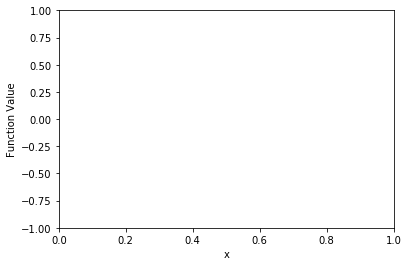

In [10]:
# Create the animation for result
anim = Animation(C)
HTML(anim.to_html5_video())

## Convergence Study

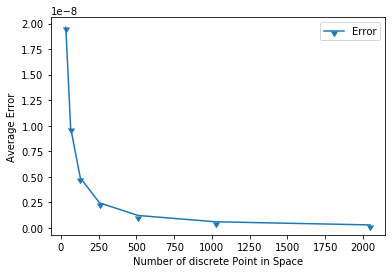

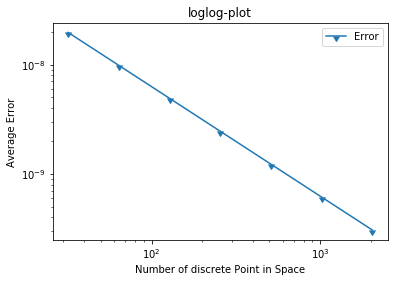

In [11]:
grid_point = [32,64,128,256,512,1024,2048]
dt = 0.0000001
Nt = 1/dt
error = []
for point in grid_point:  
    Ns = point # Number of grid points
    dx = 1/Ns
    x = np.linspace(0,L-dx,Ns) # Array of grid points
    C_0 = np.power(np.sin(np.pi*x),2)  
    temp = advection(Nt,Ns,C_0,dt,dx)
    exact = np.power(np.sin(np.pi*(x-a*dt)),2)
    error.append(np.sum(abs(exact-temp))/point)
error = np.array(error)
plt.plot(grid_point,error,marker = 11,label ="Error")
plt.xlabel("Number of discrete Point in Space")
plt.ylabel("Average Error")
plt.legend()
plt.savefig("Convergence Study.png")
plt.figure()
plt.loglog(grid_point,error,marker = 11,label ="Error")
plt.xlabel("Number of discrete Point in Space")
plt.ylabel("Average Error")
plt.title("loglog-plot")
plt.legend()
plt.savefig("Convergence Study loglog.png")

In [12]:
err_dif = np.divide((error[:-1] - error[1:]),error[1:])
err_dif

array([1.00000641, 1.0000128 , 1.00002562, 1.00005118, 1.00010248,
       1.00020479])

# Exercise 2

In [13]:
# SET up the Parameter for problem 2
L = 1 # Domain length
Ns = 100 # Number of grid points
dx = 1/Ns
x = np.linspace(0,L-dx,Ns) # Array of grid points
Nt = 800 # number of time steps
T = np.linspace(0,8,Nt) 
dt = T[1] - T[0] # time step size
a = 1 # advection speed

In [14]:
#Set Initial Condition
C_1 = np.power(np.sin(np.pi*x),2)
#Set up a matrix that stores the result at all Point
C1 = np.zeros([Nt,x.shape[0]])
# Copy the Inital Condition
C1[0,:] = np.copy(C_1)

In [15]:
#Setup The Matrix and initialize the paramter for solving system of equation
A = np.zeros((Ns,Ns))
B = np.zeros((Ns,1))
alpha = 0.01
Lambda = alpha*dt/(dx*dx)
# Get value for matrix A
set_matrix(A,Lambda)

In [16]:
for i in range(1,Nt):  #For each time step
    C_star = advection(Nt,Ns,C1[i-1,:],dt/2,dx)    #Perform first advection for time step dt/2
    C_star_star = np.linalg.solve(A,C_star)        #Perform Diffusion 
    C1[i,:] = advection(Nt,Ns,C_star_star,dt/2,dx) #Perform second advection for time step dt/2

### Uncomment the block below to play the visualization

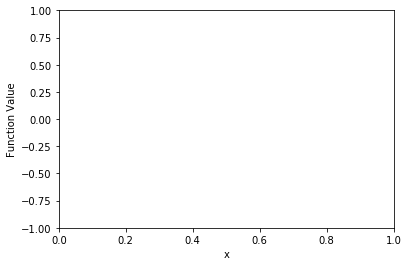

In [17]:
# Create the animation for result
anim2 = Animation(C1)
HTML(anim2.to_html5_video())

In [18]:
t_index = [i*(C1.shape[0]/4) for i in range(5)]
t_index[-1] = t_index[-1]-1
t_index

[0.0, 200.0, 400.0, 600.0, 799.0]

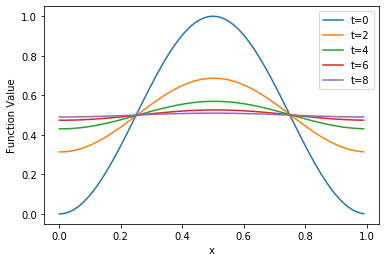

In [19]:
plt.plot(x,C1[int(t_index[0]),:],label="t=0")
plt.plot(x,C1[int(t_index[1]),:],label="t=2")
plt.plot(x,C1[int(t_index[2]),:],label="t=4")
plt.plot(x,C1[int(t_index[3]),:],label="t=6")
plt.plot(x,C1[int(t_index[4]),:],label="t=8")
plt.xlabel("x")
plt.ylabel("Function Value")
plt.legend()
plt.savefig("different_t.png")